In [1]:
from math import sqrt
from scipy import stats
from pydataset import data
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import sklearn.metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from env import host, user, password
from acquire import get_telco_data, get_telco_df, summarize_df, df_value_counts
from prepare import prep_telco, split_data, convert_cats, graph_distributions
from evaluation import evaluate

## Data Acquistion
 -Will be using functions from our acquire.py to build our pandas dataframes from SQL and form local CSV files

In [2]:
telco_df = get_telco_df()  ##displaying head of the dataframe just built using our get_telco_df
                           ## function which connects to SQL and reads the table into a 
                           ## pandas dataframe and creates a local CSV file.

In [3]:
telco_df.head() ##display dataframe 

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,3,0016-QLJIS,Female,0,Yes,Yes,65,Yes,...,Yes,Yes,Yes,Yes,90.45,5957.9,No,Two year,DSL,Mailed check
1,4,1,3,0017-DINOC,Male,0,No,No,54,No,...,Yes,Yes,No,No,45.20,2460.55,No,Two year,DSL,Credit card (automatic)
2,3,1,3,0019-GFNTW,Female,0,No,No,56,No,...,Yes,No,No,No,45.05,2560.1,No,Two year,DSL,Bank transfer (automatic)
3,4,1,3,0056-EPFBG,Male,0,Yes,Yes,20,No,...,Yes,No,No,Yes,39.40,825.4,No,Two year,DSL,Credit card (automatic)
4,3,1,3,0078-XZMHT,Male,0,Yes,No,72,Yes,...,Yes,Yes,Yes,Yes,85.15,6316.2,No,Two year,DSL,Bank transfer (automatic)


#### Summarize Dataframes columns

In [4]:
summarize_df(telco_df) ##display summary of dataframe

This dataframe has 7043 rows and 24 columns.
-------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             704

In [5]:
telco_df.describe().T ##displaying a transposed summary of numeric variable statistics

,count,mean,std,min,25%,50%,75%,max
payment_type_id,7043.0,2.315633,1.148907,1.00,1.0,2.00,3.00,4.00
internet_service_type_id,7043.0,1.872923,0.737796,1.00,1.0,2.00,2.00,3.00
contract_type_id,7043.0,1.690473,0.833755,1.00,1.0,1.00,2.00,3.00
senior_citizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
monthly_charges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


#### Categorical Variable Value Counts

In [6]:
df_value_counts(telco_df) ##displaying value counts of all the categorical variables I want to look at

Male      3555
Female    3488
Name: gender, dtype: int64
-----------------
0    5901
1    1142
Name: senior_citizen, dtype: int64
-----------------
No     3641
Yes    3402
Name: partner, dtype: int64
-----------------
No     4933
Yes    2110
Name: dependents, dtype: int64
-----------------
Yes    6361
No      682
Name: phone_service, dtype: int64
-----------------
No                  3390
Yes                 2971
No phone service     682
Name: multiple_lines, dtype: int64
-----------------
Yes    4171
No     2872
Name: paperless_billing, dtype: int64
-----------------
No     5174
Yes    1869
Name: churn, dtype: int64
-----------------
Month-to-month    3875
Two year          1695
One year          1473
Name: contract_type, dtype: int64
-----------------
Fiber optic    3096
DSL            2421
None           1526
Name: internet_service_type, dtype: int64
-----------------
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (a

#### Graph Distributions of Categorical Variables

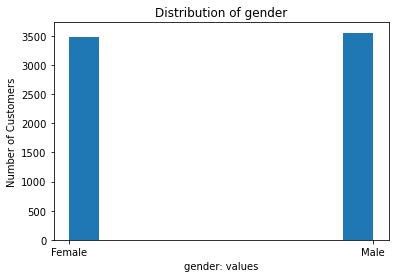

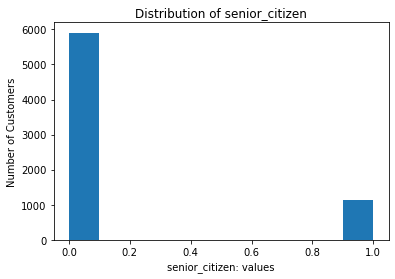

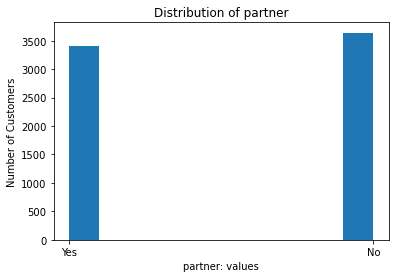

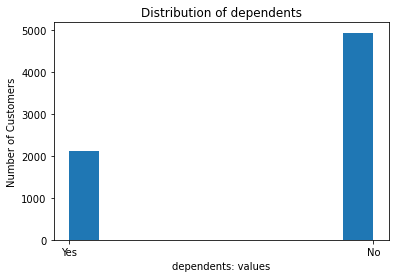

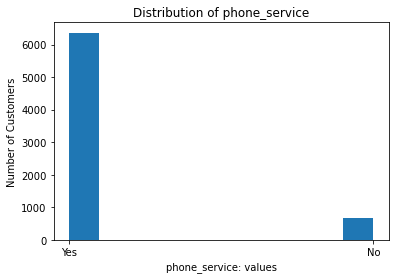

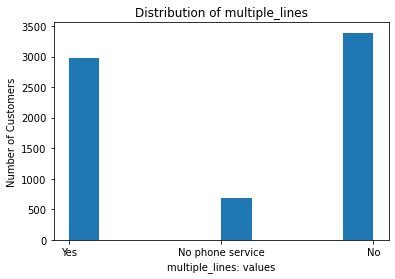

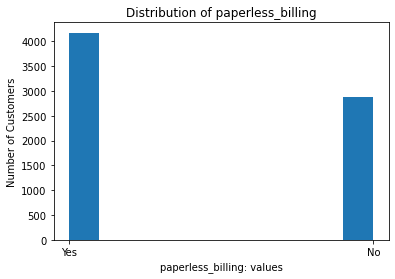

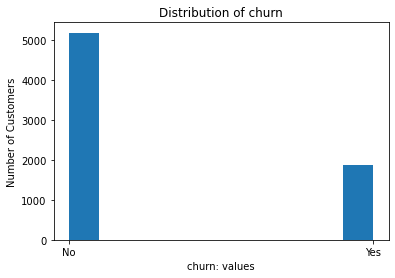

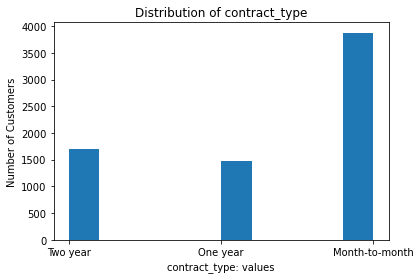

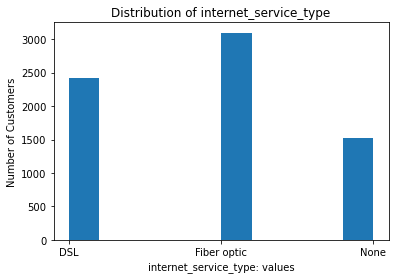

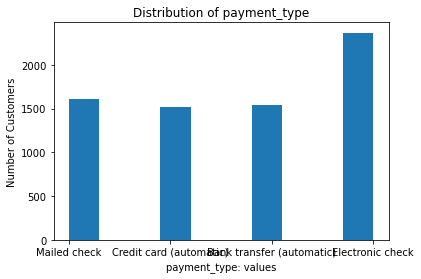

In [9]:
graph_distributions(telco_df) ## function inside prepare.py used to display histograms of 
## categorical values (viewing their distributions)

## Data Preparation

In [7]:
telco_df = prep_telco(telco_df)     
## after some acquiring I found 11 blank string values in the total_charges column
## this function was made to clean them up

In [8]:
telco_df.isnull().sum()  ## checking to make sure those null values were in fact removed

payment_type_id             0
internet_service_type_id    0
contract_type_id            0
customer_id                 0
gender                      0
senior_citizen              0
partner                     0
dependents                  0
tenure                      0
phone_service               0
multiple_lines              0
online_security             0
online_backup               0
device_protection           0
tech_support                0
streaming_tv                0
streaming_movies            0
paperless_billing           0
monthly_charges             0
total_charges               0
churn                       0
contract_type               0
internet_service_type       0
payment_type                0
dtype: int64

#### Feature Engineering

In [10]:
telco_df['fiber'] = np.where(telco_df.internet_service_type_id == 2, 1, 0)
telco_df['month_to_month'] = np.where(telco_df.contract_type_id == 1, 1, 0)
telco_df['e_check'] = np.where(telco_df.payment_type_id == 1, 1, 0)
telco_df['2_contract'] = np.where(telco_df.contract_type_id == 3, 1, 0)

## Making a month-to-month column and a fiber internet column remembering those columns were important
## in the storytelling project for looking at churn, also remembered that electonic check was a good driver as well

In [11]:
telco_df.head() ##displaying new dataframe

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,fiber,month_to_month,e_check,2_contract
0,2,1,3,0016-QLJIS,Female,0,Yes,Yes,65,Yes,...,90.45,5957.90,No,Two year,DSL,Mailed check,0,0,0,1
1,4,1,3,0017-DINOC,Male,0,No,No,54,No,...,45.20,2460.55,No,Two year,DSL,Credit card (automatic),0,0,0,1
2,3,1,3,0019-GFNTW,Female,0,No,No,56,No,...,45.05,2560.10,No,Two year,DSL,Bank transfer (automatic),0,0,0,1
3,4,1,3,0056-EPFBG,Male,0,Yes,Yes,20,No,...,39.40,825.40,No,Two year,DSL,Credit card (automatic),0,0,0,1
4,3,1,3,0078-XZMHT,Male,0,Yes,No,72,Yes,...,85.15,6316.20,No,Two year,DSL,Bank transfer (automatic),0,0,0,1


In [12]:
cols2 = ['senior_citizen',
        'multiple_lines',
        'paperless_billing', 'contract_type', 'fiber', 'month_to_month', 'e_check', '2_contract']

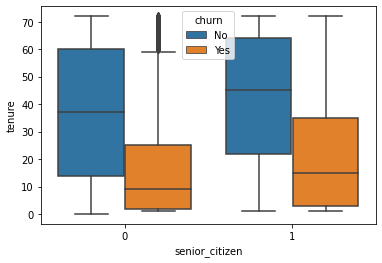

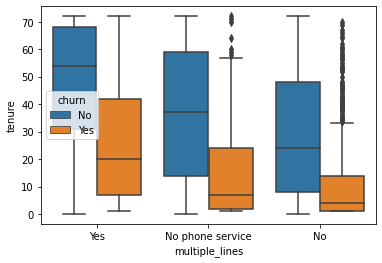

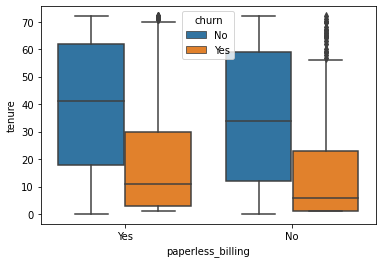

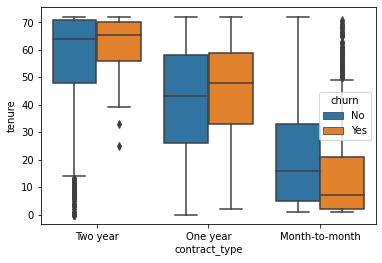

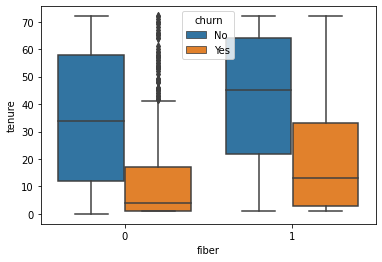

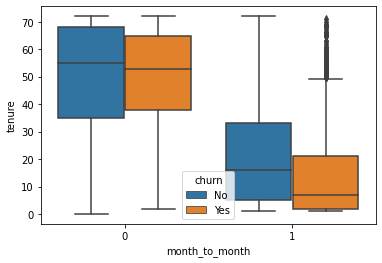

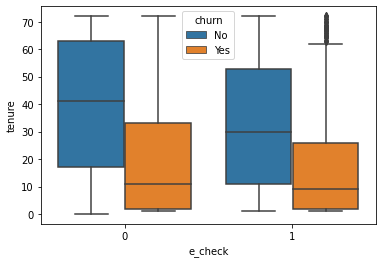

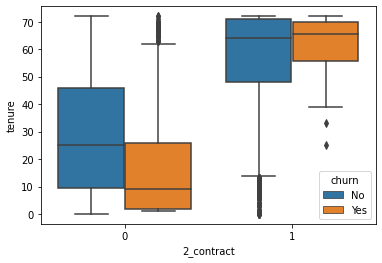

In [13]:
for col in cols2:  ### looking at box plots of tenure vs all the columns with churn
                ### as a hue to determine what questions I would like to ask for my 
        ### statistical analysis
    sns.boxplot(data = telco_df, x= col, y='tenure', hue = 'churn') 
    plt.show()

#### Using label encoder from Skmetrics to convert categorical variables to numerical values

In [14]:
telco_num = convert_cats(telco_df) ##converting dataframe to numerical dataframe for computer format
## Using a label encoder function found in sklearn's library
telco_num.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,fiber,month_to_month,e_check,2_contract
0,2,1,3,9,0,0,1,1,65,1,...,90.45,5957.90,0,2,0,3,0,0,0,1
1,4,1,3,10,1,0,0,0,54,0,...,45.20,2460.55,0,2,0,1,0,0,0,1
2,3,1,3,14,0,0,0,0,56,0,...,45.05,2560.10,0,2,0,0,0,0,0,1
3,4,1,3,34,1,0,1,1,20,0,...,39.40,825.40,0,2,0,1,0,0,0,1
4,3,1,3,45,1,0,1,0,72,1,...,85.15,6316.20,0,2,0,0,0,0,0,1


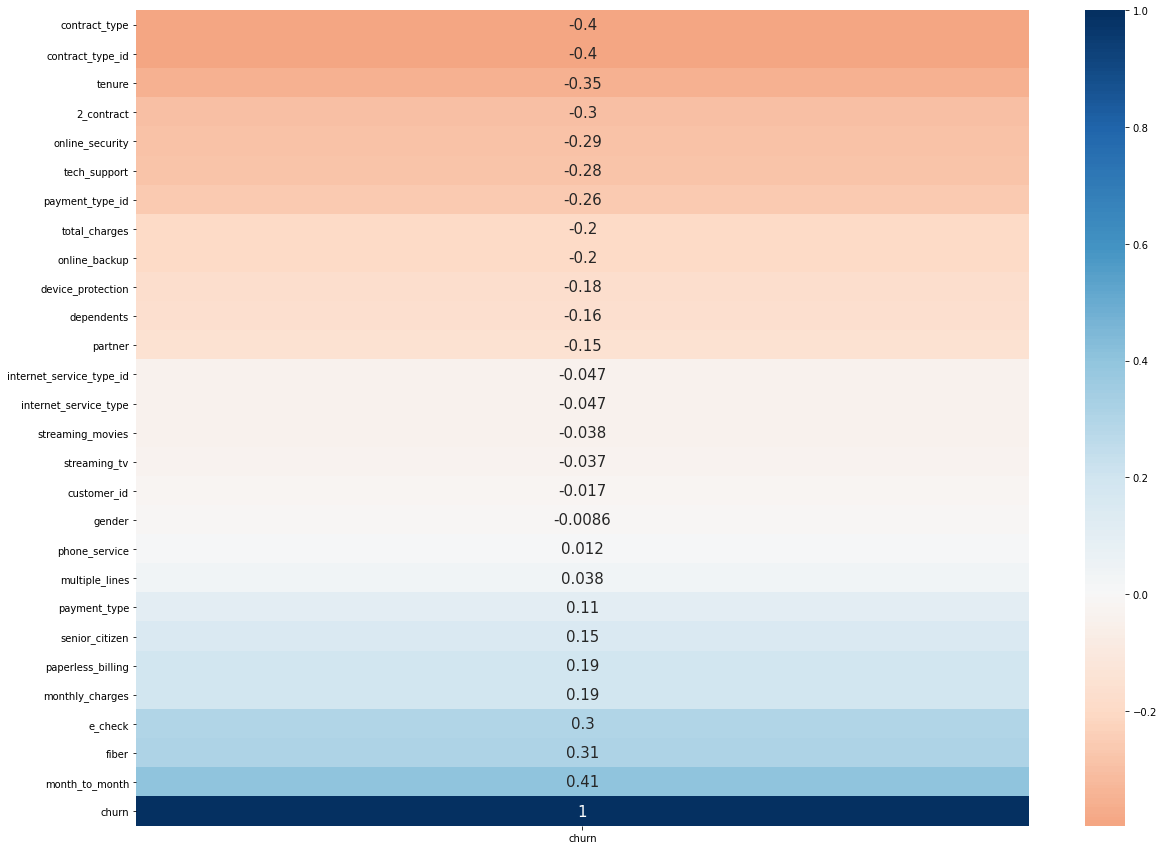

In [58]:
plt.figure(figsize = (20,15))  ##making a heap map to look at correlations with churn for the train data set
sns.heatmap(telco_df.corr()[['churn']].sort_values(by='churn'), cmap ='RdBu', center = 0, annot = True, annot_kws={"size": 15})
plt.show()                    ## helping me choose which features to use in my model

## Explore & Hypothesis

### Question 1: Is there a relationship between customers with paperless billing and whether or not they churned

In [60]:
alpha = 0.05 ##setting alpha value

##### $H_0$: There is no relationship between paperless billing and whether or not a customer has churned

##### $H_a$: There is a relationship between paperless billing customers and whether or not they have churned

In [17]:
telco_num = convert_cats(telco_df) ##converting dataframe to numerical dataframe for computer format
telco_num.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,fiber,month_to_month,e_check,2_contract
0,2,1,3,9,0,0,1,1,65,1,...,90.45,5957.90,0,2,0,3,0,0,0,1
1,4,1,3,10,1,0,0,0,54,0,...,45.20,2460.55,0,2,0,1,0,0,0,1
2,3,1,3,14,0,0,0,0,56,0,...,45.05,2560.10,0,2,0,0,0,0,0,1
3,4,1,3,34,1,0,1,1,20,0,...,39.40,825.40,0,2,0,1,0,0,0,1
4,3,1,3,45,1,0,1,0,72,1,...,85.15,6316.20,0,2,0,0,0,0,0,1


In [18]:
observed = pd.crosstab(telco_num.paperless_billing, telco_num.churn)

## ^making a crosstab of the observed values for the chi^2 test. (paperless_billing and churn)
chi2, p, degf, expected = stats.chi2_contingency(observed)

## ^ performing the test on observed and outputting results
print('Observed\n')
print(observed)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

churn                 0     1
paperless_billing            
0                  2403   469
1                  2771  1400
---
Expected

[[2109.85773108  762.14226892]
 [3064.14226892 1106.85773108]]
---

chi^2 = 258.2776
p     = 0.0000


### Question 2: Is there a relationship between if a customer has multiple lines and whether or not they have churned

In [59]:
alpha = 0.05

##### $H_0$: There is no relationship between customers having multiple lines and whether or not they have churned

##### $H_a$: There is a relationship between customers having multiple lines and whether or not they have churned


In [20]:
observed = pd.crosstab(telco_num.multiple_lines, telco_num.churn)

## ^making a crosstab of the observed values for the chi^2 test. (paperless_billing and churn)
chi2, p, degf, expected = stats.chi2_contingency(observed)

## ^ performing the test on observed and outputting results
print('Observed\n')
print(observed)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

churn              0    1
multiple_lines           
0               2541  849
1                512  170
2               2121  850
---
Expected

[[2490.39613801  899.60386199]
 [ 501.01774812  180.98225188]
 [2182.58611387  788.41388613]]
---

chi^2 = 11.3304
p     = 0.0035


### Chi Squared Takeways

##### Given our p value is less than our alpha (0.05) and is nearly approaching 0 we can reject our null hypothesis and same there is a significant relationship between paperless billing and whether or not a customer has churned

##### Given our p value is less than our alpha (0.05) and is 0.0035 we can reject our null hypothesis and same there is a significant relationship between the multiple line customer data and whether or not they have churned

## Data Split Part II

In [21]:
train, validate, test = split_data(telco_num) 
##using split function to split data into train, test, split

In [22]:
train.shape, validate.shape, test.shape ##printing out shapes of df's to make sure they are consistent

((3943, 28), (1691, 28), (1409, 28))

In [23]:
train.head() ## displaying train dataset

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,fiber,month_to_month,e_check,2_contract
5642,4,3,3,1332,0,0,1,1,23,1,...,25.60,514.75,0,2,2,1,0,0,0,1
3338,3,2,2,6343,1,0,0,0,27,1,...,100.50,2673.45,0,1,1,0,1,0,0,0
4273,1,2,1,2887,0,1,0,0,7,1,...,89.15,574.35,0,0,1,2,1,1,1,0
2382,3,1,1,6787,0,0,1,0,47,1,...,58.60,2723.40,0,0,0,0,0,1,0,0
2655,4,2,3,4037,1,0,0,0,41,1,...,99.65,4220.35,0,2,1,1,1,0,0,1


In [24]:
validate.head() ## displaying validate dataset

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,fiber,month_to_month,e_check,2_contract
1630,2,1,1,2564,1,0,0,0,2,1,...,53.85,108.15,1,0,0,3,0,1,0,0
5181,1,2,1,5943,1,0,0,1,1,1,...,71.65,71.65,1,0,1,2,1,1,1,0
4239,3,2,1,2779,0,1,0,0,23,1,...,75.40,1643.55,0,0,1,0,1,1,0,0
5814,2,3,3,3252,1,0,1,1,45,1,...,24.45,1088.25,0,2,2,3,0,0,0,1
1438,3,1,1,1425,0,0,1,0,5,1,...,67.95,350.30,1,0,0,0,0,1,0,0


In [25]:
test.head() ## displaying test dataset

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,fiber,month_to_month,e_check,2_contract
2789,3,2,3,6121,1,0,0,0,72,1,...,113.40,8164.10,0,2,1,0,1,0,0,1
1233,3,1,1,229,1,0,1,0,11,1,...,45.90,521.90,0,0,0,0,0,1,0,0
6784,2,3,1,3357,1,0,0,0,1,1,...,20.20,20.20,1,0,2,3,0,1,0,0
3177,1,2,2,4210,1,0,1,0,71,1,...,109.60,7854.15,0,1,1,2,1,0,1,0
1740,2,1,1,3093,1,0,0,0,2,1,...,44.65,74.90,1,0,0,3,0,1,0,0


## Model Building & Evaluation

#### Determining Baseline Accuracy

In [26]:
train.churn.value_counts() ## doing value counts to look at what should be our baseline

0    2897
1    1046
Name: churn, dtype: int64

In [27]:
train['baseline'] = 0  ## adding a baseline column to train data set. Set to 0 because that
train.head()           ## is the most frequent value

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,total_charges,churn,contract_type,internet_service_type,payment_type,fiber,month_to_month,e_check,2_contract,baseline
5642,4,3,3,1332,0,0,1,1,23,1,...,514.75,0,2,2,1,0,0,0,1,0
3338,3,2,2,6343,1,0,0,0,27,1,...,2673.45,0,1,1,0,1,0,0,0,0
4273,1,2,1,2887,0,1,0,0,7,1,...,574.35,0,0,1,2,1,1,1,0,0
2382,3,1,1,6787,0,0,1,0,47,1,...,2723.40,0,0,0,0,0,1,0,0,0
2655,4,2,3,4037,1,0,0,0,41,1,...,4220.35,0,2,1,1,1,0,0,1,0


In [28]:
## calculating a baseline accuracy
base_acc = (train.baseline == train.churn).mean()
print(f'The baseline accuracy is: {base_acc:.4f}')

The baseline accuracy is: 0.7347


In [29]:
##set up X and Ys
cols = ['tenure', 'fiber', 'monthly_charges', 'month_to_month', 'e_check', '2_contract']


X_train, y_train = train[cols], train.churn
X_validate, y_validate = validate[cols], validate.churn
X_test, y_test = test[cols], test.churn

# Performing Train Tests

### Decision Tree Classifier Train test

In [30]:
model = DecisionTreeClassifier(random_state = 123, max_depth = 10)   #making a decision tree model
model.fit(X_train, y_train)              # fitting the model to train df's
 
print(f'The baseline accuracy is: {base_acc:.4%}') # printing out the basleline accuracy for comparison
evaluate(X_train, y_train, model)      # printing out model scores on train df

The baseline accuracy is: 73.4720%

    The accuracy for our model is 86.4570%

    The True Positive Rate is 75.813%,    The False Positive Rate is 9.700%,
    The True Negative Rate is 90.300%,    The False Negative Rate is 24.187%

    ________________________________________________________________________________
    

    The positive is  'churned'

    Confusion Matrix
    


,pred_not_churned,pred_churned
actual_not_churned,True Negative: 2616,False positive: 281
actual_churned,False Negative: 253,True Positive: 793




    ________________________________________________________________________________
    
    Classification Report:
    


,precision,recall,f1-score,support
not churned,0.911816,0.903003,0.907388,2897.00000
churned,0.738361,0.758126,0.748113,1046.00000
accuracy,0.864570,0.864570,0.864570,0.86457
macro avg,0.825089,0.830565,0.827751,3943.00000
weighted avg,0.865802,0.864570,0.865136,3943.00000


#### Decision Tree Takeaways:
    - Given the idea that we want to predict the customers that will churn because we want to try to prevent as many churns as possible. This is a good model for us because the True Positive prediction is 75.8% meaning we have a good prediction of customers that will churn and have a good chance to save some of their business.

### Random Forest Model Train Test

In [31]:
forest_model = RandomForestClassifier()   # making a random forest model
forest_model.fit(X_train, y_train)       # fitting the model to train

print(f'The baseline accuracy is: {base_acc:.4%}')   # printing out the baseline for comparison
evaluate(X_train, y_train, forest_model)   #printing out model scores for train

The baseline accuracy is: 73.4720%

    The accuracy for our model is 99.2138%

    The True Positive Rate is 97.992%,    The False Positive Rate is 0.345%,
    The True Negative Rate is 99.655%,    The False Negative Rate is 2.008%

    ________________________________________________________________________________
    

    The positive is  'churned'

    Confusion Matrix
    


,pred_not_churned,pred_churned
actual_not_churned,True Negative: 2887,False positive: 10
actual_churned,False Negative: 21,True Positive: 1025




    ________________________________________________________________________________
    
    Classification Report:
    


,precision,recall,f1-score,support
not churned,0.992779,0.996548,0.994660,2897.000000
churned,0.990338,0.979924,0.985103,1046.000000
accuracy,0.992138,0.992138,0.992138,0.992138
macro avg,0.991558,0.988236,0.989882,3943.000000
weighted avg,0.992131,0.992138,0.992125,3943.000000


#### Random Forest Takeaways:
    - Anytime we see a model with around 98% accuracy or more in all the columns this is a definite sign of overfitting. Most likely will not use this model on the validate dataset

### KNN Model Train Test

In [32]:
knn_model = KNeighborsClassifier(n_neighbors = 5) #making a k nearest neighbor model 
knn_model.fit(X_train, y_train) #fitting the model to train

print(f'The baseline accuracy is: {base_acc:.4%}') #printing out the baseline accuracy for comparison
evaluate(X_train, y_train, knn_model) #using evaluate function from evaluation file to print out scores

The baseline accuracy is: 73.4720%

    The accuracy for our model is 83.7687%

    The True Positive Rate is 58.891%,    The False Positive Rate is 7.249%,
    The True Negative Rate is 92.751%,    The False Negative Rate is 41.109%

    ________________________________________________________________________________
    

    The positive is  'churned'

    Confusion Matrix
    


,pred_not_churned,pred_churned
actual_not_churned,True Negative: 2687,False positive: 210
actual_churned,False Negative: 430,True Positive: 616




    ________________________________________________________________________________
    
    Classification Report:
    


,precision,recall,f1-score,support
not churned,0.862047,0.927511,0.893582,2897.000000
churned,0.745763,0.588910,0.658120,1046.000000
accuracy,0.837687,0.837687,0.837687,0.837687
macro avg,0.803905,0.758211,0.775851,3943.000000
weighted avg,0.831199,0.837687,0.831118,3943.000000


#### KNN Model Takeaways:
    - Looking at the True Positive rate at 58.8% but a really high negative churn prediction rate at 92.8% we may want to look at using this model for our validate dataframe. It does not seem overfit the accuracy seems realistic enough to continue testing.

### Logistic Regression Model Train Test

In [33]:
logic_model = LogisticRegression(random_state = 123)  ##making a logistic regression model
logic_model.fit(X_train, y_train) ##fitting model to train

print(f'The baseline accuracy is: {base_acc:.4%}')
evaluate(X_train, y_train, logic_model)

The baseline accuracy is: 73.4720%

    The accuracy for our model is 79.3051%

    The True Positive Rate is 50.000%,    The False Positive Rate is 10.114%,
    The True Negative Rate is 89.886%,    The False Negative Rate is 50.000%

    ________________________________________________________________________________
    

    The positive is  'churned'

    Confusion Matrix
    


,pred_not_churned,pred_churned
actual_not_churned,True Negative: 2604,False positive: 293
actual_churned,False Negative: 523,True Positive: 523




    ________________________________________________________________________________
    
    Classification Report:
    


,precision,recall,f1-score,support
not churned,0.832747,0.898861,0.864542,2897.000000
churned,0.640931,0.500000,0.561762,1046.000000
accuracy,0.793051,0.793051,0.793051,0.793051
macro avg,0.736839,0.699430,0.713152,3943.000000
weighted avg,0.781862,0.793051,0.784220,3943.000000


#### Logistic Regression Takeaways:
    - This model has realistic accuracy and does not seem overfit, however, the True Positive rate predicting churn isn't very high which is what we are looking for because predicting the customers that will churn the (True Positive) will help the business take action and try to save their business.

### Random Forest Model 2 Train Test

In [34]:
forest_model2 = RandomForestClassifier(max_leaf_nodes = 70)
forest_model2.fit(X_train, y_train)

print(f'The baseline accuracy is: {base_acc:.4%}')  ##printing baseline accuracy to compare
evaluate(X_train, y_train, forest_model2)

The baseline accuracy is: 73.4720%

    The accuracy for our model is 84.4281%

    The True Positive Rate is 60.899%,    The False Positive Rate is 7.076%,
    The True Negative Rate is 92.924%,    The False Negative Rate is 39.101%

    ________________________________________________________________________________
    

    The positive is  'churned'

    Confusion Matrix
    


,pred_not_churned,pred_churned
actual_not_churned,True Negative: 2692,False positive: 205
actual_churned,False Negative: 409,True Positive: 637




    ________________________________________________________________________________
    
    Classification Report:
    


,precision,recall,f1-score,support
not churned,0.868107,0.929237,0.897633,2897.000000
churned,0.756532,0.608987,0.674788,1046.000000
accuracy,0.844281,0.844281,0.844281,0.844281
macro avg,0.812320,0.769112,0.786210,3943.000000
weighted avg,0.838508,0.844281,0.838516,3943.000000


#### Random Forest II Takeaways:
    - By increasing the number of of max leaf nodes we have reduced the overfitting of the dataset. With a decent True Positive Prediction and a High True Negative we may want to look at this model for the validate dataframe

# Performing Validate Tests

#### Decision Tree Validate Test

In [35]:
print(f'The baseline accuracy is: {base_acc:.4%}')  ##printing baseline accuracy to compare
evaluate(X_validate, y_validate, model)

The baseline accuracy is: 73.4720%

    The accuracy for our model is 75.2809%

    The True Positive Rate is 56.570%,    The False Positive Rate is 17.955%,
    The True Negative Rate is 82.045%,    The False Negative Rate is 43.430%

    ________________________________________________________________________________
    

    The positive is  'churned'

    Confusion Matrix
    


,pred_not_churned,pred_churned
actual_not_churned,True Negative: 1019,False positive: 223
actual_churned,False Negative: 195,True Positive: 254




    ________________________________________________________________________________
    
    Classification Report:
    


,precision,recall,f1-score,support
not churned,0.839374,0.820451,0.829805,1242.000000
churned,0.532495,0.565702,0.548596,449.000000
accuracy,0.752809,0.752809,0.752809,0.752809
macro avg,0.685934,0.693076,0.689200,1691.000000
weighted avg,0.757890,0.752809,0.755137,1691.000000


#### KNN Model Validate Test

In [36]:
print(f'The baseline accuracy is: {base_acc:.4%}')  ##printing baseline accuracy to compare
evaluate(X_validate, y_validate, knn_model)

The baseline accuracy is: 73.4720%

    The accuracy for our model is 77.1733%

    The True Positive Rate is 43.875%,    The False Positive Rate is 10.789%,
    The True Negative Rate is 89.211%,    The False Negative Rate is 56.125%

    ________________________________________________________________________________
    

    The positive is  'churned'

    Confusion Matrix
    


,pred_not_churned,pred_churned
actual_not_churned,True Negative: 1108,False positive: 134
actual_churned,False Negative: 252,True Positive: 197




    ________________________________________________________________________________
    
    Classification Report:
    


,precision,recall,f1-score,support
not churned,0.814706,0.892110,0.851653,1242.000000
churned,0.595166,0.438753,0.505128,449.000000
accuracy,0.771733,0.771733,0.771733,0.771733
macro avg,0.704936,0.665431,0.678390,1691.000000
weighted avg,0.756413,0.771733,0.759642,1691.000000


#### Random Forest II Validate Test

In [37]:
print(f'The baseline accuracy is: {base_acc:.4%}') ##printing baseline accuracy to compare
evaluate(X_validate, y_validate, forest_model2)

The baseline accuracy is: 73.4720%

    The accuracy for our model is 79.0065%

    The True Positive Rate is 49.443%,    The False Positive Rate is 10.306%,
    The True Negative Rate is 89.694%,    The False Negative Rate is 50.557%

    ________________________________________________________________________________
    

    The positive is  'churned'

    Confusion Matrix
    


,pred_not_churned,pred_churned
actual_not_churned,True Negative: 1114,False positive: 128
actual_churned,False Negative: 227,True Positive: 222




    ________________________________________________________________________________
    
    Classification Report:
    


,precision,recall,f1-score,support
not churned,0.830723,0.896940,0.862563,1242.000000
churned,0.634286,0.494432,0.555695,449.000000
accuracy,0.790065,0.790065,0.790065,0.790065
macro avg,0.732505,0.695686,0.709129,1691.000000
weighted avg,0.778565,0.790065,0.781082,1691.000000


#### Validate Test Takeaways: 
    - As a telecommunciations business we want to test the model with the highest True Positive rate and the highest accuracy. That we with a decent True Positive prediciton rate we can predict the customers that will churn and do our best as a business to save them
    - Optimizing for recall was difficult all the models seem to have high True Negative rates and precision, but, the Decision Tree model has the highest True Positive rate that we are looking for and we will use it on the Test dataframe

## Performing Test on Decision Tree

In [38]:
print(f'The baseline accuracy is: {base_acc:.4%}') ##printing baseline accuracy to compare
evaluate(X_test, y_test, model) ##

The baseline accuracy is: 73.4720%

    The accuracy for our model is 76.7211%

    The True Positive Rate is 60.695%,    The False Positive Rate is 17.488%,
    The True Negative Rate is 82.512%,    The False Negative Rate is 39.305%

    ________________________________________________________________________________
    

    The positive is  'churned'

    Confusion Matrix
    


,pred_not_churned,pred_churned
actual_not_churned,True Negative: 854,False positive: 181
actual_churned,False Negative: 147,True Positive: 227




    ________________________________________________________________________________
    
    Classification Report:
    


,precision,recall,f1-score,support
not churned,0.853147,0.825121,0.838900,1035.000000
churned,0.556373,0.606952,0.580563,374.000000
accuracy,0.767211,0.767211,0.767211,0.767211
macro avg,0.704760,0.716036,0.709731,1409.000000
weighted avg,0.774372,0.767211,0.770328,1409.000000


## Test Model Takeways

#### With a successfully tested model higher than the baseline accuracy we can conclude that we have built a successful model. With a 82 percent prediction rate on customers who will not churn we can use this along side our 60.7 percent churn prediction. We can use these alongside each other and utilize our business tools to save 6 out of 10 customers form churning by offering greater incentives or promotions

#### Making CSV with predictions and Customer_Id

In [39]:
#my decision tree's probabilities
probabilities = model.predict_proba(X_test)

In [40]:
#turning the probability predictions into a dataframe to add to the test dataframe
proba_df = pd.DataFrame(probabilities, columns=model.classes_.tolist())
proba_df.head()

,0,1
0,1.000000,0.000000
1,0.787879,0.212121
2,0.612903,0.387097
3,1.000000,0.000000
4,0.557692,0.442308


In [41]:
telco_df2 = get_telco_data()
telco_df2.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,3,0016-QLJIS,Female,0,Yes,Yes,65,Yes,...,Yes,Yes,Yes,Yes,90.45,5957.9,No,Two year,DSL,Mailed check
1,4,1,3,0017-DINOC,Male,0,No,No,54,No,...,Yes,Yes,No,No,45.20,2460.55,No,Two year,DSL,Credit card (automatic)
2,3,1,3,0019-GFNTW,Female,0,No,No,56,No,...,Yes,No,No,No,45.05,2560.1,No,Two year,DSL,Bank transfer (automatic)
3,4,1,3,0056-EPFBG,Male,0,Yes,Yes,20,No,...,Yes,No,No,Yes,39.40,825.4,No,Two year,DSL,Credit card (automatic)
4,3,1,3,0078-XZMHT,Male,0,Yes,No,72,Yes,...,Yes,Yes,Yes,Yes,85.15,6316.2,No,Two year,DSL,Bank transfer (automatic)


In [42]:
train, validate, test2 = split_data(telco_df2)

In [43]:
test2.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
2789,3,2,3,8670-ERCJH,Male,0,No,No,72,Yes,...,Yes,Yes,Yes,No,113.40,8164.1,No,Two year,Fiber optic,Bank transfer (automatic)
1233,3,1,1,0356-ERHVT,Male,0,Yes,No,11,Yes,...,No,No,No,Yes,45.90,521.9,No,Month-to-month,DSL,Bank transfer (automatic)
6784,2,3,1,4786-UKSNZ,Male,0,No,No,1,Yes,...,No internet service,No internet service,No internet service,No,20.20,20.2,Yes,Month-to-month,None,Mailed check
3177,1,2,2,5945-AZYHT,Male,0,Yes,No,71,Yes,...,No,Yes,Yes,Yes,109.60,7854.15,No,One year,Fiber optic,Electronic check
1740,2,1,1,4432-ADRLB,Male,0,No,No,2,Yes,...,No,No,No,No,44.65,74.9,Yes,Month-to-month,DSL,Mailed check


In [44]:
test2['predictions'] = model.predict(X_test)

In [45]:
test2 = test2.reset_index()
test2.head()

,index,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,...,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,predictions
0,2789,3,2,3,8670-ERCJH,Male,0,No,No,72,...,Yes,Yes,No,113.40,8164.1,No,Two year,Fiber optic,Bank transfer (automatic),0
1,1233,3,1,1,0356-ERHVT,Male,0,Yes,No,11,...,No,No,Yes,45.90,521.9,No,Month-to-month,DSL,Bank transfer (automatic),0
2,6784,2,3,1,4786-UKSNZ,Male,0,No,No,1,...,No internet service,No internet service,No,20.20,20.2,Yes,Month-to-month,None,Mailed check,0
3,3177,1,2,2,5945-AZYHT,Male,0,Yes,No,71,...,Yes,Yes,Yes,109.60,7854.15,No,One year,Fiber optic,Electronic check,0
4,1740,2,1,1,4432-ADRLB,Male,0,No,No,2,...,No,No,No,44.65,74.9,Yes,Month-to-month,DSL,Mailed check,0


In [46]:
test_proba_df = pd.concat([test2, proba_df], axis=1)
test_proba_df.head()

,index,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,...,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,predictions,0,1
0,2789,3,2,3,8670-ERCJH,Male,0,No,No,72,...,No,113.40,8164.1,No,Two year,Fiber optic,Bank transfer (automatic),0,1.000000,0.000000
1,1233,3,1,1,0356-ERHVT,Male,0,Yes,No,11,...,Yes,45.90,521.9,No,Month-to-month,DSL,Bank transfer (automatic),0,0.787879,0.212121
2,6784,2,3,1,4786-UKSNZ,Male,0,No,No,1,...,No,20.20,20.2,Yes,Month-to-month,None,Mailed check,0,0.612903,0.387097
3,3177,1,2,2,5945-AZYHT,Male,0,Yes,No,71,...,Yes,109.60,7854.15,No,One year,Fiber optic,Electronic check,0,1.000000,0.000000
4,1740,2,1,1,4432-ADRLB,Male,0,No,No,2,...,No,44.65,74.9,Yes,Month-to-month,DSL,Mailed check,0,0.557692,0.442308


In [47]:
telco_prediction = test_proba_df[['customer_id',0,1, 'predictions']]
telco_prediction.head()

,customer_id,0,1,predictions
0,8670-ERCJH,1.000000,0.000000,0
1,0356-ERHVT,0.787879,0.212121,0
2,4786-UKSNZ,0.612903,0.387097,0
3,5945-AZYHT,1.000000,0.000000,0
4,4432-ADRLB,0.557692,0.442308,0


In [48]:
telco_prediction['No Churn %'] = telco_prediction[0]  ##renaming columns
telco_prediction['Churn %'] = telco_prediction[1]
telco_csv = telco_prediction.drop(columns = [0,1])    ##dropping old columns
telco_csv.head()                                      ##displaying df for csv

,customer_id,predictions,No Churn %,Churn %
0,8670-ERCJH,0,1.000000,0.000000
1,0356-ERHVT,0,0.787879,0.212121
2,4786-UKSNZ,0,0.612903,0.387097
3,5945-AZYHT,0,1.000000,0.000000
4,4432-ADRLB,0,0.557692,0.442308


In [49]:
## reading the new df to a csv for my github repo
telco_csv.to_csv('telco_csv.csv')